In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 柱状图

应用于比较分类变量的数值，例如可以用于展示衣服裤子鞋子等商品的销售量。

### 本期内容：
1. 主要参数介绍
2. 添加x轴标签tick label
3. 添加数据标签
4. 实例讲解
5. 其他柱状图类型

解决matplotlib中文显示问题的参数设置,可以看这个网站：

https://segmentfault.com/a/1190000005144275

## 1.主要参数介绍：

bar(left, height, width=0.8, bottom=None, **kwargs)

1. left为和分类数量一致的数值序列，序列里的数值数量决定了柱子的个数，数值大小决定了距离0点的位置
2. height为分类变量的数值大小，决定了柱子的高度
3. width决定了柱子的宽度，仅代表形状宽度而已
4. bottom决定了柱子距离x轴的高度，默认为None，即表示与x轴距离为0

<Container object of 5 artists>

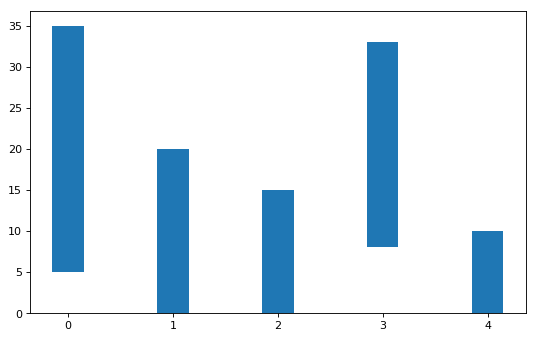

In [4]:
data = pd.DataFrame({"label":["a","b","c","d","e"],"value":[30,20,15,25,10]})

x = data["label"]
y = data["value"]

fig,ax = plt.subplots(figsize=(8,5),dpi=80)

ax.bar(np.arange(len(x)),y,width=0.3,bottom=[5,0,0,8,0])

## 2.添加x轴标签tick label

<BarContainer object of 5 artists>

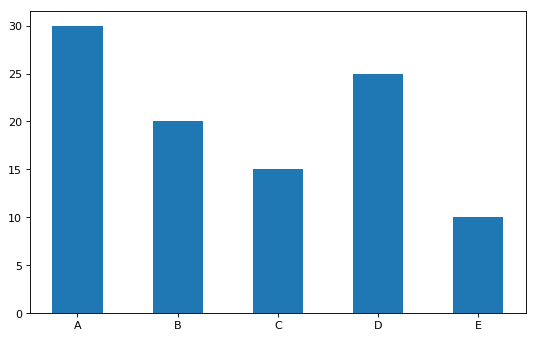

In [3]:
data = pd.DataFrame({"label":["a","b","c","d","e"],"value":[30,20,15,25,10]})

x = data["label"]
y = data["value"]

fig,ax = plt.subplots(figsize=(8,5),dpi=80)

ax.bar(np.arange(len(x)),y,width=0.5,tick_label=["A","B","C","D","E"])

In [12]:
data

,label,value
0,a,30
1,b,20
2,c,15
3,d,25
4,e,10


## 3.添加数据标签

In [ ]:
data = pd.DataFrame({"label":["a","b","c","d","e"],"value":[30,20,15,25,10]})

x = data["label"]
y = data["value"]

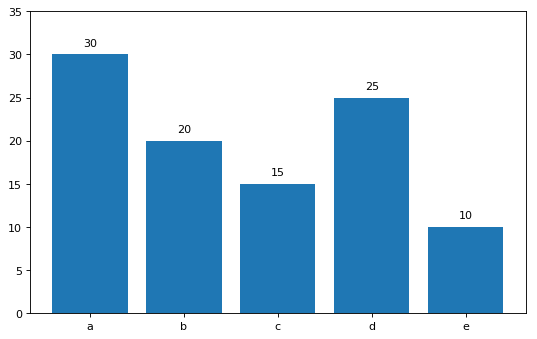

In [8]:
data = pd.DataFrame({"label":["a","b","c","d","e"],"value":[30,20,15,25,10]})

x = data["label"]
y = data["value"]

fig,ax = plt.subplots(figsize=(8,5),dpi=80)
ax.bar(np.arange(len(x)),y,tick_label=x)
ax.set_ylim(0,35)
for a,b in zip(np.arange(len(x)),y):
    ax.text(a,b+1,b,ha="center",fontsize=10)

## 4.实例练习：

In [9]:
df = pd.read_csv("../Data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Q1：我想知道在泰坦尼克号事故中不同等级舱位的获救人数**

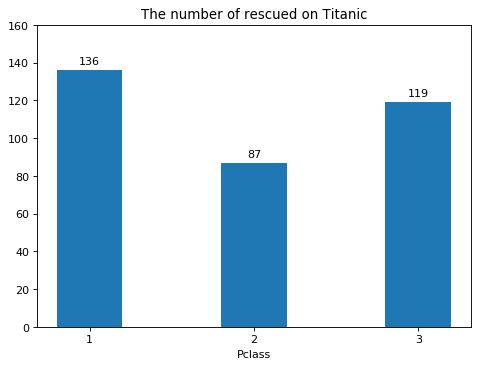

In [10]:
x = np.unique(df["Pclass"])
y = df.groupby("Pclass")["Survived"].sum()

fig,ax = plt.subplots(figsize=(7,5),dpi=80)

ax.bar(np.arange(len(x)),y,tick_label=x,width=0.4)
ax.set_xlabel("Pclass")
ax.set_title("The number of rescued on Titanic")
ax.set_ylim(0,160)

for a,b in zip(np.arange(len(x)),y):
    ax.text(a,b+3,b,ha="center",fontsize=10)

结论：从图中我们可以知道1等舱的获救人数最多，3等舱次之，2等舱获救人数最少

其实这个问题用pandas绘图来做更简单：

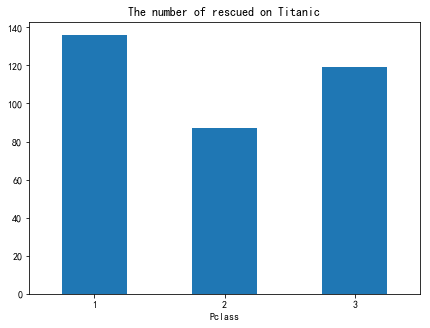

In [57]:
df.groupby("Pclass")["Survived"].sum().plot(kind="bar",title="The number of rescued on Titanic",figsize=(7,5),rot=0)

解释下pandas绘图

In [58]:
df1 = pd.DataFrame({"class":["a","b","c"],"score":[80,90,100]})
df1

,class,score
0,a,80
1,b,90
2,c,100


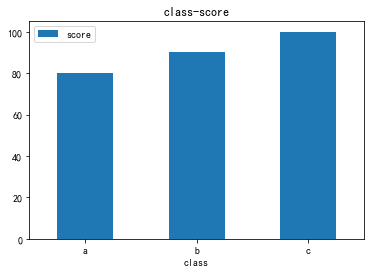

In [59]:
df1.plot(x="class",y="score",kind="bar",rot=0,title="class-score")

**Q2：我想进一步了解不同等级舱位中男女的获救人数情况**

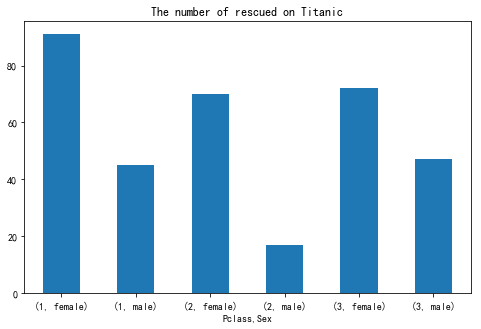

In [61]:
df.groupby(["Pclass","Sex"])["Survived"].sum().plot(kind="bar",rot=0,figsize=(8,5),title="The number of rescued on Titanic")

**通过【pandas绘图 + matplotlib面向对象绘图】来做更个性化的图**

[]

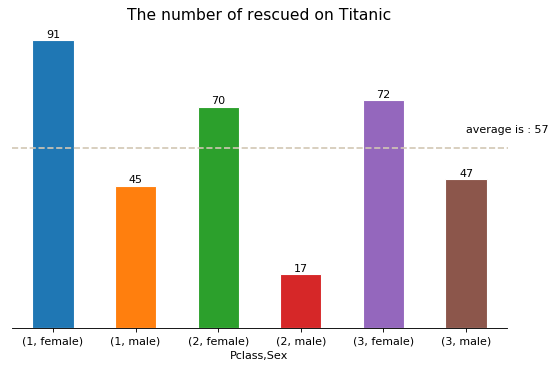

In [17]:
fig,ax = plt.subplots(figsize=(8,5),dpi=80)

#数据分类汇总
df_ps = df.groupby(["Pclass","Sex"])["Survived"].sum()

#用pandas绘图画出分类汇总后的数据，并与ax对象关联起来
df_ps.plot(kind="bar",rot=0,figsize=(8,5),ax=ax,edgecolor="w")

ax.set_title("The number of rescued on Titanic",fontsize=14)

#添加数据标签
for a,b in zip(np.arange(len(df_ps.values)),df_ps.values):
    ax.text(a,b+1,b,ha="center")
    
#添加一条平均线,表示每个性别每个舱位的平均获救人数
avg = df["Survived"].sum()/6
ax.axhline(y=avg,color=(210/255,199/255,180/255),linestyle='--')
ax.text(5,avg+5,"average is : "+str(int(avg)))

#去除左右上的边框线，去除掉y轴刻度
ax.spines["left"].set_color("none") 
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_yticks([])

## 5.其他柱状图类型

### （1）堆积柱状图

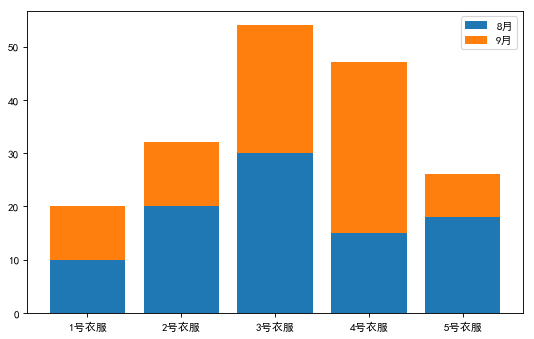

In [20]:
#显示中文字体为SimHei
plt.rcParams["font.sans-serif"]=["SimHei"]

sale8 = [10,20,30,15,18]
sale9 = [10,12,24,32,8]
labels = ["{}号衣服".format(i) for i in range(1,6)]

fig,ax = plt.subplots(figsize=(8,5),dpi=80)

ax.bar(np.arange(len(sale8)),sale8,tick_label=labels,label="8月")
ax.bar(np.arange(len(sale9)),sale9,bottom=sale8,tick_label=labels,label="9月")
ax.legend()

### （2）并列柱状图

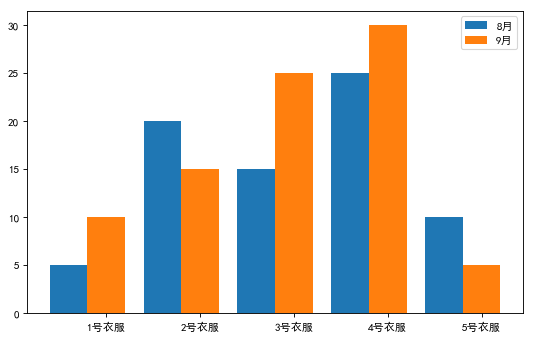

In [69]:
#显示中文字体为SimHei
plt.rcParams['font.sans-serif']=['SimHei']

sale8 = [5,20,15,25,10]
sale9 = [10,15,25,30,5]
labels = ["{}号衣服".format(i) for i in range(1,6)]

fig,ax = plt.subplots(figsize=(8,5),dpi=80)
width_1 = 0.4

ax.bar(np.arange(len(sale8)),sale8,width=width_1,tick_label=labels,label = "8月")
ax.bar(np.arange(len(sale9))+width_1,sale9,width=width_1,tick_label=labels,label="9月")
ax.legend()